# <font color=darkblue>CE 5364 Groundwater Transport Phenemona <br> Fall 2023 Exercise Set 4</font>

**LAST NAME, FIRST NAME**

**R00000000**

<hr>

### Purpose : 
Reactive transport concepts and application of isotherms to estimate retardation
 
### Assessment Criteria : 
Completion, results plausible, format correct, example calculations shown.  


<hr><hr>

## Problem 1 

A fuel mixture of benzene, toluene, ethylbenzene at mole fractions 0.075, 0.065, and 0.035 respectively equilibrates with the atmosphere at 25$^oC$

![](Fig4-13.png) ![](Tab7-1.png)

Determine:
1. Concentration in the gas (air) phase of the three components in $\frac{mg}{L}$
2. Concentration in the gas (air) phase of the three components in $\frac{\mu g}{m^3}$

## Use Gas Law

Gas law 

$$ pV = \frac{m}{M}RT$$

put in mass into numerator

$$ \frac{m}{pV} = \frac{m}{\frac{m}{M}RT}$$

recall $\frac{m}{M}$ is the number of moles, or mole fraction.  $p$ is partial pressure of indicated species. Apply some algebra

$$ \frac{m}{V} = \frac{p \cdot m}{\frac{m}{M}RT}$$  

a bit more algebra

$$ \frac{m}{V} = \frac{p \cdot M}{RT}$$ 

So other than unit conversions, the above formula should return desired concentrations in gas phase.


In [2]:
R = 0.0821 # L-atm/K-mol
Temp = 298 # K

benzene_mole_fraction = 0.075 #molFraction
toluene_mole_fraction = 0.065
ethylbenzene_mole_fraction = 0.035

benzene_vapor_press = 60 #mmHg from Table 7.1
toluene_vapor_press = 22
ethylbenzene_vapor_press = 7

mw_benzene = 78.11 #g/mol from Figure 4.13
mw_toluene = 92.1
mw_ethylbenzene = 106.7

benzene_mixture_pressure = benzene_mole_fraction*benzene_vapor_press
toluene_mixture_pressure = toluene_mole_fraction*toluene_vapor_press
ethylbenzene_mixture_pressure = ethylbenzene_mole_fraction*ethylbenzene_vapor_press

print("Benzene partial pressure in gas phase : ",round(benzene_mixture_pressure,3), "mmHg")
print("Toluene partial pressure in gas phase : ",round(toluene_mixture_pressure,3), "mmHg")
print("Ethylbenzene partial pressure in gas phase : ",round(ethylbenzene_mixture_pressure,3), "mmHg")

#pressure to atmospheres,g to milligrams
benzene_mixture_conc = 1000*mw_benzene*(benzene_mixture_pressure/760)/(R*Temp)
toluene_mixture_conc = 1000*mw_toluene*(toluene_mixture_pressure/760)/(R*Temp)
ethylbenzene_mixture_conc = 1000*mw_ethylbenzene*(ethylbenzene_mixture_pressure/760)/(R*Temp)


print("Benzene conc. in gas phase ",round(benzene_mixture_conc,3)," mg/L ")
print("Toluene conc. in gas phase ",round(toluene_mixture_conc,3)," mg/L ")
print("Ethylbenzene conc. in gas phase ",round(ethylbenzene_mixture_conc,3)," mg/L ")

Benzene partial pressure in gas phase :  4.5 mmHg
Toluene partial pressure in gas phase :  1.43 mmHg
Ethylbenzene partial pressure in gas phase :  0.245 mmHg
Benzene conc. in gas phase  18.904  mg/L 
Toluene conc. in gas phase  7.083  mg/L 
Ethylbenzene conc. in gas phase  1.406  mg/L 


Convert to micrograms/m^3

$$\frac{mg}{L} \times \frac{1000~\mu g}{mg} \times \frac{1000~L}{m^3} = \frac{\mu g}{m^3}$$

In [3]:
print("Benzene conc. in gas phase ",round(1000*1000*benzene_mixture_conc,3)," ug/m^3 ")
print("Toluene conc. in gas phase ",round(1000*1000*toluene_mixture_conc,3)," ug/m^3 ")
print("Ethylbenzene conc. in gas phase ",round(1000*1000*ethylbenzene_mixture_conc,3)," ug/m^3 ")

Benzene conc. in gas phase  18903670.473  ug/m^3 
Toluene conc. in gas phase  7083088.272  ug/m^3 
Ethylbenzene conc. in gas phase  1405909.904  ug/m^3 


<hr><hr>

## Problem 2 (Modified from 6.22 pg. 592)

A well with effective diameter of 0.5 m fully penetrates an aquifer that has a uniform saturated thickness of 10 m.  One hundred grams of benzene are spilled into the well, immediately dissolve, and mix into the water in the well. The seepage velocity is 30 m/yr in the x-direction, the longitudinal dispersivity is 1.0 m, and the transverse dispersivity is 0.1 m.
The aquifer has the following characteristics: 

- Bulk density = 1.8 g/cc
- porosity = 0.30
- $f_{oc}$ =  1 percent
- $K_{ow}$ = 135 L/kg

Determine:

1. The retardation factor R for benzene in this aquifer.  
2. The maximum benzene concentration at t = 1 yr.  
3. The location of this maximum.


In [4]:
# Enter your solution below, or attach separate sheet(s) with your solution.

**Retardation Definition**

$1 + \frac{\rho_b}{n} K_d = R$

**$K_d$ Definition for Benzene**

$K_d = f_{oc}k_{oc}$

**$k_{oc}$ regression (Table 7.2 textbook)**

$ln~k_{oc} = 0.544 ln~k_{ow} + 1.377$

or use tabulations such as 

![](kowtable.png)

> The tabulation above is base-10 logarithms; the regressions are base-e logarithms.


In [15]:
import math
kow = 135 #L/kg
# using a regression formula
logkoc = math.log(kow)*0.544+1.377
#logkoc = math.log(kow)-0.21
koc = math.exp(logkoc)
print(round(koc,3))

# using tabulation above
kkoc = 10**(1.78)
print(round(kkoc,3))

# using deMarsily's rule of thumb
k_oc = 0.411*kow
print(round(k_oc,3))

# like your nose, pick one

57.138
60.256
55.485


In [16]:
foc = 0.01 # given
kdee = foc*k_oc
print(round(kdee,3))

0.555


In [17]:
rhob = 1.8 #kg/L
porosity = 0.30 #given
rrr = 1.0 + kdee*rhob/porosity
print("Retardation coefficient :",round(rrr,3))

Retardation coefficient : 4.329


In [18]:
def impulse2D(x,y,t,m,dx,dy,v,r):
    import math
    dispx=dx/r
    dispy=dy/r
    vel=v/r
    term1 = (4.0*math.pi*t)*math.sqrt(dispx*dispy)
    term2 = math.exp(-((x-vel*t)**2)/(4.0*dispx*t) -((y)**2)/(4.0*dispy*t))
    impulse2D = (m/term1)*term2
    return(impulse2D)

In [19]:
import math
diam = 0.5 #m
thick = 10.0 #m
volume = 0.25*math.pi*diam**2
mass        = 0.1 #kg
conc0 = mass/volume
cA = conc0*thick*diam
velocity    = 30.0/365.0 #m/day
alphal=1.0
alphat=0.1
dx = alphal*velocity  #m^2/day
dy = alphat*velocity #m^2/day

print("            Conc : ",round(conc0,3)," kg/m^3")
print("          Conc*A : ",round(cA,3)," kg-m^2/m^3")
print("Well bore volume : ",round(volume,3)," m^3")
print("   Pore velocity : ",round(velocity,3)," m/day")
print("    Dispersion x : ",round(dx,3)," m^2/day")
print("    Dispersion y : ",round(dy,3)," m^2/day")


            Conc :  0.509  kg/m^3
          Conc*A :  2.546  kg-m^2/m^3
Well bore volume :  0.196  m^3
   Pore velocity :  0.082  m/day
    Dispersion x :  0.082  m^2/day
    Dispersion y :  0.008  m^2/day


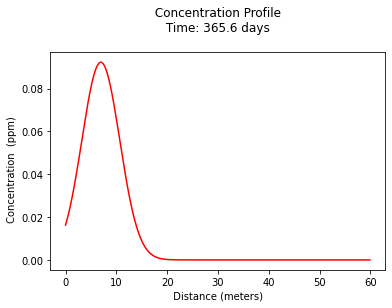

In [20]:
deltax      = (0.1) #meters
howmany =     60/deltax
howmany = int(howmany)

x = [] #meters
for i in range(howmany):
    x.append(float(i)*deltax)

    
t        = 365.6  #days
y        = 0    #meters


c = [0 for i in range(howmany)] #concentration 

for i in range(howmany):
    c[i]=impulse2D(x[i],y,t,cA,dx,dy,velocity,rrr)


#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(x,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration Profile \n Time: " + repr(t) + " days \n" ) # caption the plot object
plt.xlabel(" Distance (meters) ") # label x-axis
plt.ylabel(" Concentration  (ppm)      ") # label y-axis
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

In [21]:
# find location of peak at 1 year
print("Maximum concentration : ",round(max(c),3)," kg/m^3")
print("          Observed at : ",round(x[c.index(max(c))],3)," meters")
xloc = x[c.index(max(c))]

Maximum concentration :  0.092  kg/m^3
          Observed at :  6.9  meters


Now make a history plot at 6.8 meters

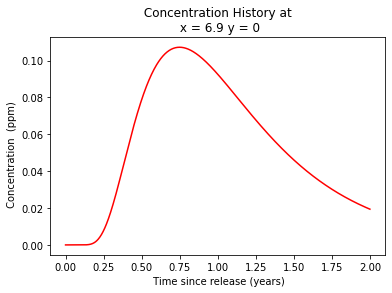

0.09246825378606165


In [29]:
#
# forward define and initialize vectors for a profile plot
#
time=365*2 #days
how_many_points = 365*2   
deltat = time/how_many_points #
t = [i*deltat for i in range(how_many_points)] # constructor notation
c = [0.0 for i in range(how_many_points)]      # constructor notation
x = xloc
y = 0
t[0]=1e-5 #cannot have zero time, so use really small value first position in list
#
# build the profile predictions
#
r=2
for i in range(0,how_many_points,1):
    c[i] = impulse2D(x,y,t[i],cA,dx,dy,velocity,rrr)
for i in range(0,how_many_points,1):
    t[i]=t[i]/365 # days as years
#
# Import graphics routines for picture making
#
from matplotlib import pyplot as plt
#
# Build and Render the Plot
#
plt.plot(t,c, color='red', linestyle = 'solid')  # make the plot object
plt.title(" Concentration History at \n " + "x = " + repr(round(x,3)) + " y = " + repr(y)) # caption the plot object
plt.xlabel(" Time since release (years)") # label x-axis
plt.ylabel(" Concentration  (ppm)      ") # label y-axis
#plt.savefig("ogatabanksplot.png") # optional generates just a plot for embedding into a report
plt.show() # plot to stdio -- has to be last call as it kills prior objects
plt.close('all') # needed when plt.show call not invoked, optional here
#sys.exit() # used to elegant exit for CGI-BIN use

print(impulse2D(6.9,0,365,cA,dx,dy,velocity,rrr))

Summary:

1. The retardation factor R for benzene in this aquifer is 4.428
2. The maximum benzene concentration at t = 1 yr is 0.092  kg/m^3
3. The location of this maximum is at $(x,y)=(6.8,0)$ meters.

<hr><hr> 

## Problem 3 

The following data for concentration of TCE were taken at a single monitoring well.  Use the Mann-Kendall test (pp. 458-460) to determine whether the concentration has an upward or downward trend.


|Date|TCE (ppb)|
|:---|:---|
|9/92|8|
|12/92|19|
|3/93|21|
|6/93|13|
|9/93|39|
|12/93|24|
|3/94|28|
|6/94|25|


Determine:
1. The upward or downward concentration trend, using a Mann-Kendall test.

Hints:<br>
1. [Mann-Kendall Explaination (YouTube)](https://www.youtube.com/watch?v=YvoxgeahoI0)
2. [Trend Analysis (US EPA)](https://www.epa.gov/sites/default/files/2016-05/documents/tech_notes_6_dec2013_trend.pdf)

In [201]:
# Enter your solution below, or attach separate sheet(s) with your solution.


Trend type:  increasing
Attained Significance at rejection : 0.063


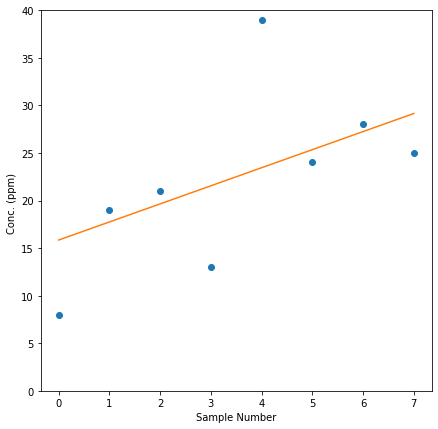

In [202]:
import numpy as np
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
gfg_data = [8,19,21,13,39,24,28,25]
 
# perform Mann-Kendall Trend Test
result=mk.original_test(gfg_data,alpha=0.1)
print("Trend type: ",result.trend)
print("Attained Significance at rejection :",round(result.p,3))
trend_line = np.arange(len(gfg_data))*result.slope + result.intercept

#data plot 
plt.figure(figsize=(7,7))
plt.plot(gfg_data,marker='o',linewidth=0)
plt.plot(trend_line)
plt.xlabel("Sample Number")
plt.ylabel("Conc. (ppm) ")
plt.ylim(0,40);
# autocorrelation plot
#fig, ax = plt.subplots(figsize=(12, 8))
#sm.graphics.tsa.plot_acf(gfg_data, lags=7, ax=ax);